In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data_path = 'ForestFireDataset_PeninsularMalaysia_Filtered.csv'
df = pd.read_csv(data_path)
df.head()

,system:index,current_aet_annual,current_def_annual,current_pdsi_annual,current_pet_annual,current_pr_annual,current_ro_annual,current_soil_annual,current_srad_annual,current_swe_annual,...,ADM0_EN,ADM1_EN,ADM2_EN,validOn,Shape_Area,ADM0_PCODE,BurnDate,year,month,day
0,1_2001_09_01_00000000000000000071_0,107.900000,1.591667,1.225000,109.483333,296.416667,188.666667,111.983333,188.691667,0.0,...,Malaysia,Johor,Segamat,1613030400000,0.233776,MY,270,2001,9,27
1,1_2001_09_01_00000000000000000071_1,107.900000,1.591667,1.225000,109.483333,296.416667,188.666667,111.983333,188.691667,0.0,...,Malaysia,Johor,Segamat,1613030400000,0.233776,MY,256,2001,9,13
2,1_2001_09_01_00000000000000000014_0,107.300000,1.483333,1.194167,108.791667,294.416667,187.166667,111.141667,187.225000,0.0,...,Malaysia,Terengganu,Dungun,1613030400000,0.219613,MY,264,2001,9,21
3,1_2001_09_01_00000000000000000014_1,107.300000,1.483333,1.194167,108.791667,294.416667,187.166667,111.141667,187.225000,0.0,...,Malaysia,Terengganu,Dungun,1613030400000,0.219613,MY,264,2001,9,21
4,1_2001_09_01_00000000000000000014_2,100.983333,0.916667,1.966667,101.900000,204.416667,103.333333,86.308333,173.558333,0.0,...,Malaysia,Terengganu,Dungun,1613030400000,0.219613,MY,257,2001,9,14


# Barchart Finding Missing Data

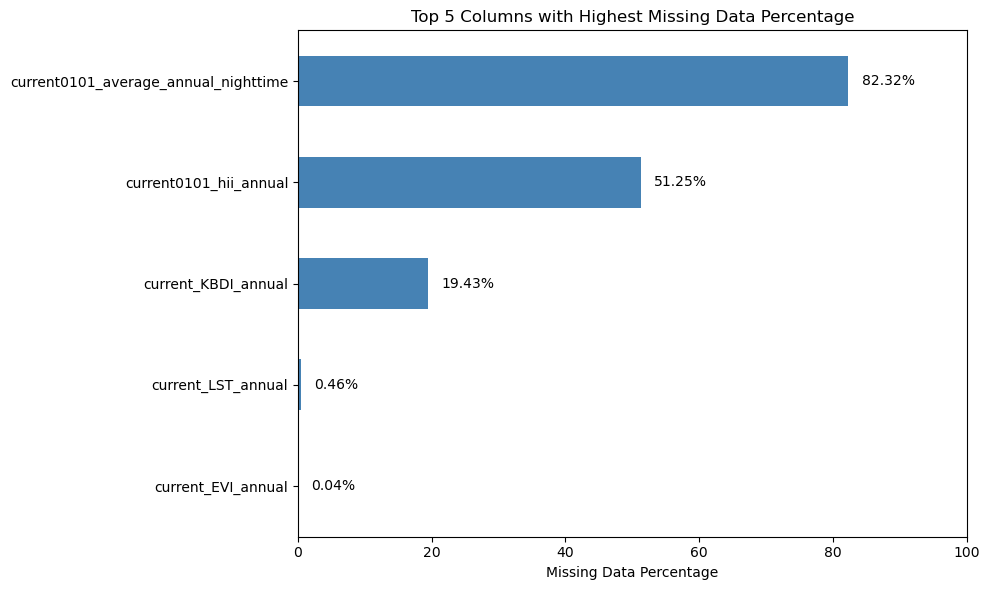

In [3]:
# Check Missing Data
missing_percentage = (df.isnull().sum() / len(df)) * 100
top_missing = missing_percentage.nlargest(5).sort_values(ascending=True)


# Plotting the top missing data percentage with swapped axes
plt.figure(figsize=(10, 6))
bars = top_missing.plot(kind='barh', color='steelblue')  # Changed 'bar' to 'barh'
plt.title('Top 5 Columns with Highest Missing Data Percentage')
plt.xlabel('Missing Data Percentage')  # Changed x-axis label

# Annotate each bar with its corresponding percentage value
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', 
             va='center', ha='left')  # Increased the x-coordinate

# Set the x-axis limits to 0 and 100
plt.xlim(0, 100)

plt.tight_layout()
plt.savefig('1 Column Missing Percentage.png', dpi=300)
plt.show()

In [4]:
top_missing

current_EVI_annual                       0.036091
current_LST_annual                       0.460164
current_KBDI_annual                     19.426148
current0101_hii_annual                  51.249662
current0101_average_annual_nighttime    82.315258
dtype: float64

# Standard Deviation and Mean

In [5]:
df_fire = df[df['fire'] == 1]
df_nofire = df[df['fire'] == 0]

columns_to_drop = ['longitude', 'latitude', 'fire', 'date', 'Shape_Leng', 'validOn', 'Shape_Area', 'year', 'month', 'day',
                   'ADM1_PCODE', 'ADM2_PCODE', 'ADM0_EN', 'ADM1_EN', 'ADM2_EN', 'ADM0_PCODE', 'system:index']

# Drop the specified columns
df_fire = df_fire.drop(columns=columns_to_drop)
df_nofire = df_nofire.drop(columns=columns_to_drop)

In [6]:
df_fire = df_fire.describe().transpose()
df_nofire = df_nofire.describe().transpose()
df_fire.columns = ['fire_' + col for col in df_fire.columns]
df_nofire.columns = ['nofire_' + col for col in df_nofire.columns]

In [7]:
df_fire

,fire_count,fire_mean,fire_std,fire_min,fire_25%,fire_50%,fire_75%,fire_max
current_aet_annual,5557.0,104.877329,9.327677,68.258333,97.225000,106.208333,111.266667,129.433333
current_def_annual,5557.0,7.798602,7.765711,0.000000,1.550000,4.391667,12.658333,26.058333
current_pdsi_annual,5557.0,0.453241,2.904917,-5.475000,-1.590000,0.527500,2.466667,6.464167
current_pet_annual,5557.0,112.675726,12.855094,68.325000,99.300000,113.091667,122.241667,137.733333
current_pr_annual,5557.0,202.796638,36.599987,127.500000,175.166667,201.666667,228.833333,376.583333
current_ro_annual,5557.0,97.523604,41.038559,14.833333,65.666667,93.416667,128.750000,307.333333
current_soil_annual,5557.0,95.142469,52.392154,27.958333,46.433333,82.458333,139.866667,243.175000
current_srad_annual,5557.0,185.405127,24.571278,129.791667,161.766667,186.116667,201.908333,236.966667
current_swe_annual,5557.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
current_tmmn_annual,5557.0,23.474154,0.549855,13.591667,23.275000,23.550000,23.766667,24.683333


In [8]:
df_stat = pd.concat([df_fire, df_nofire], axis=1)

In [9]:
# List of columns to sort by
columns_to_sort_by = ['current0101_LC_Type2_annual', 'current0101_average_annual_nighttime', 'current0101_hii_annual',
                      'current_EVI_annual', 'current_KBDI_annual', 'current_LST_annual', 'current_NDVI_annual',
                      'current_aet_annual', 'current_def_annual', 'current_pdsi_annual', 'current_pet_annual',
                      'current_pr_annual', 'current_ro_annual', 'current_soil_annual', 'current_srad_annual',
                      'current_swe_annual', 'current_tmmn_annual', 'current_tmmx_annual', 'current_vap_annual',
                      'current_vpd_annual', 'current_vs_annual','BurnDate']


In [10]:
df_stat = df_stat.loc[columns_to_sort_by]
df_stat[['fire_count','fire_mean','fire_std','nofire_count','nofire_mean','nofire_std']]

,fire_count,fire_mean,fire_std,nofire_count,nofire_mean,nofire_std
current0101_LC_Type2_annual,5557.0,9.613101,3.652621,5526.0,3.088853,2.465596
current0101_average_annual_nighttime,1960.0,1.339290,2.232185,0.0,NaN,NaN
current0101_hii_annual,5403.0,2094.722932,881.257247,0.0,NaN,NaN
current_EVI_annual,5553.0,0.369616,0.059076,5526.0,0.460531,0.064722
current_KBDI_annual,3404.0,95.862034,55.793098,5526.0,21.638714,9.450237
current_LST_annual,5522.0,304.470895,1.561426,5510.0,299.544256,2.200019
current_NDVI_annual,5553.0,0.567431,0.078325,5526.0,0.684663,0.075106
current_aet_annual,5557.0,104.877329,9.327677,5526.0,96.147513,8.020696
current_def_annual,5557.0,7.798602,7.765711,5526.0,0.572920,0.925342
current_pdsi_annual,5557.0,0.453241,2.904917,5526.0,3.939350,1.623397


# Boxplot Analysis

In [11]:
columns_to_drop = ['longitude', 'latitude', 'date', 'Shape_Leng', 'validOn', 'Shape_Area', 'year', 'month', 'day',
                   'ADM1_PCODE', 'ADM2_PCODE', 'ADM0_EN', 'ADM1_EN', 'ADM2_EN', 'ADM0_PCODE', 'system:index']

# Drop the specified columns
df_box = df.drop(columns=columns_to_drop)


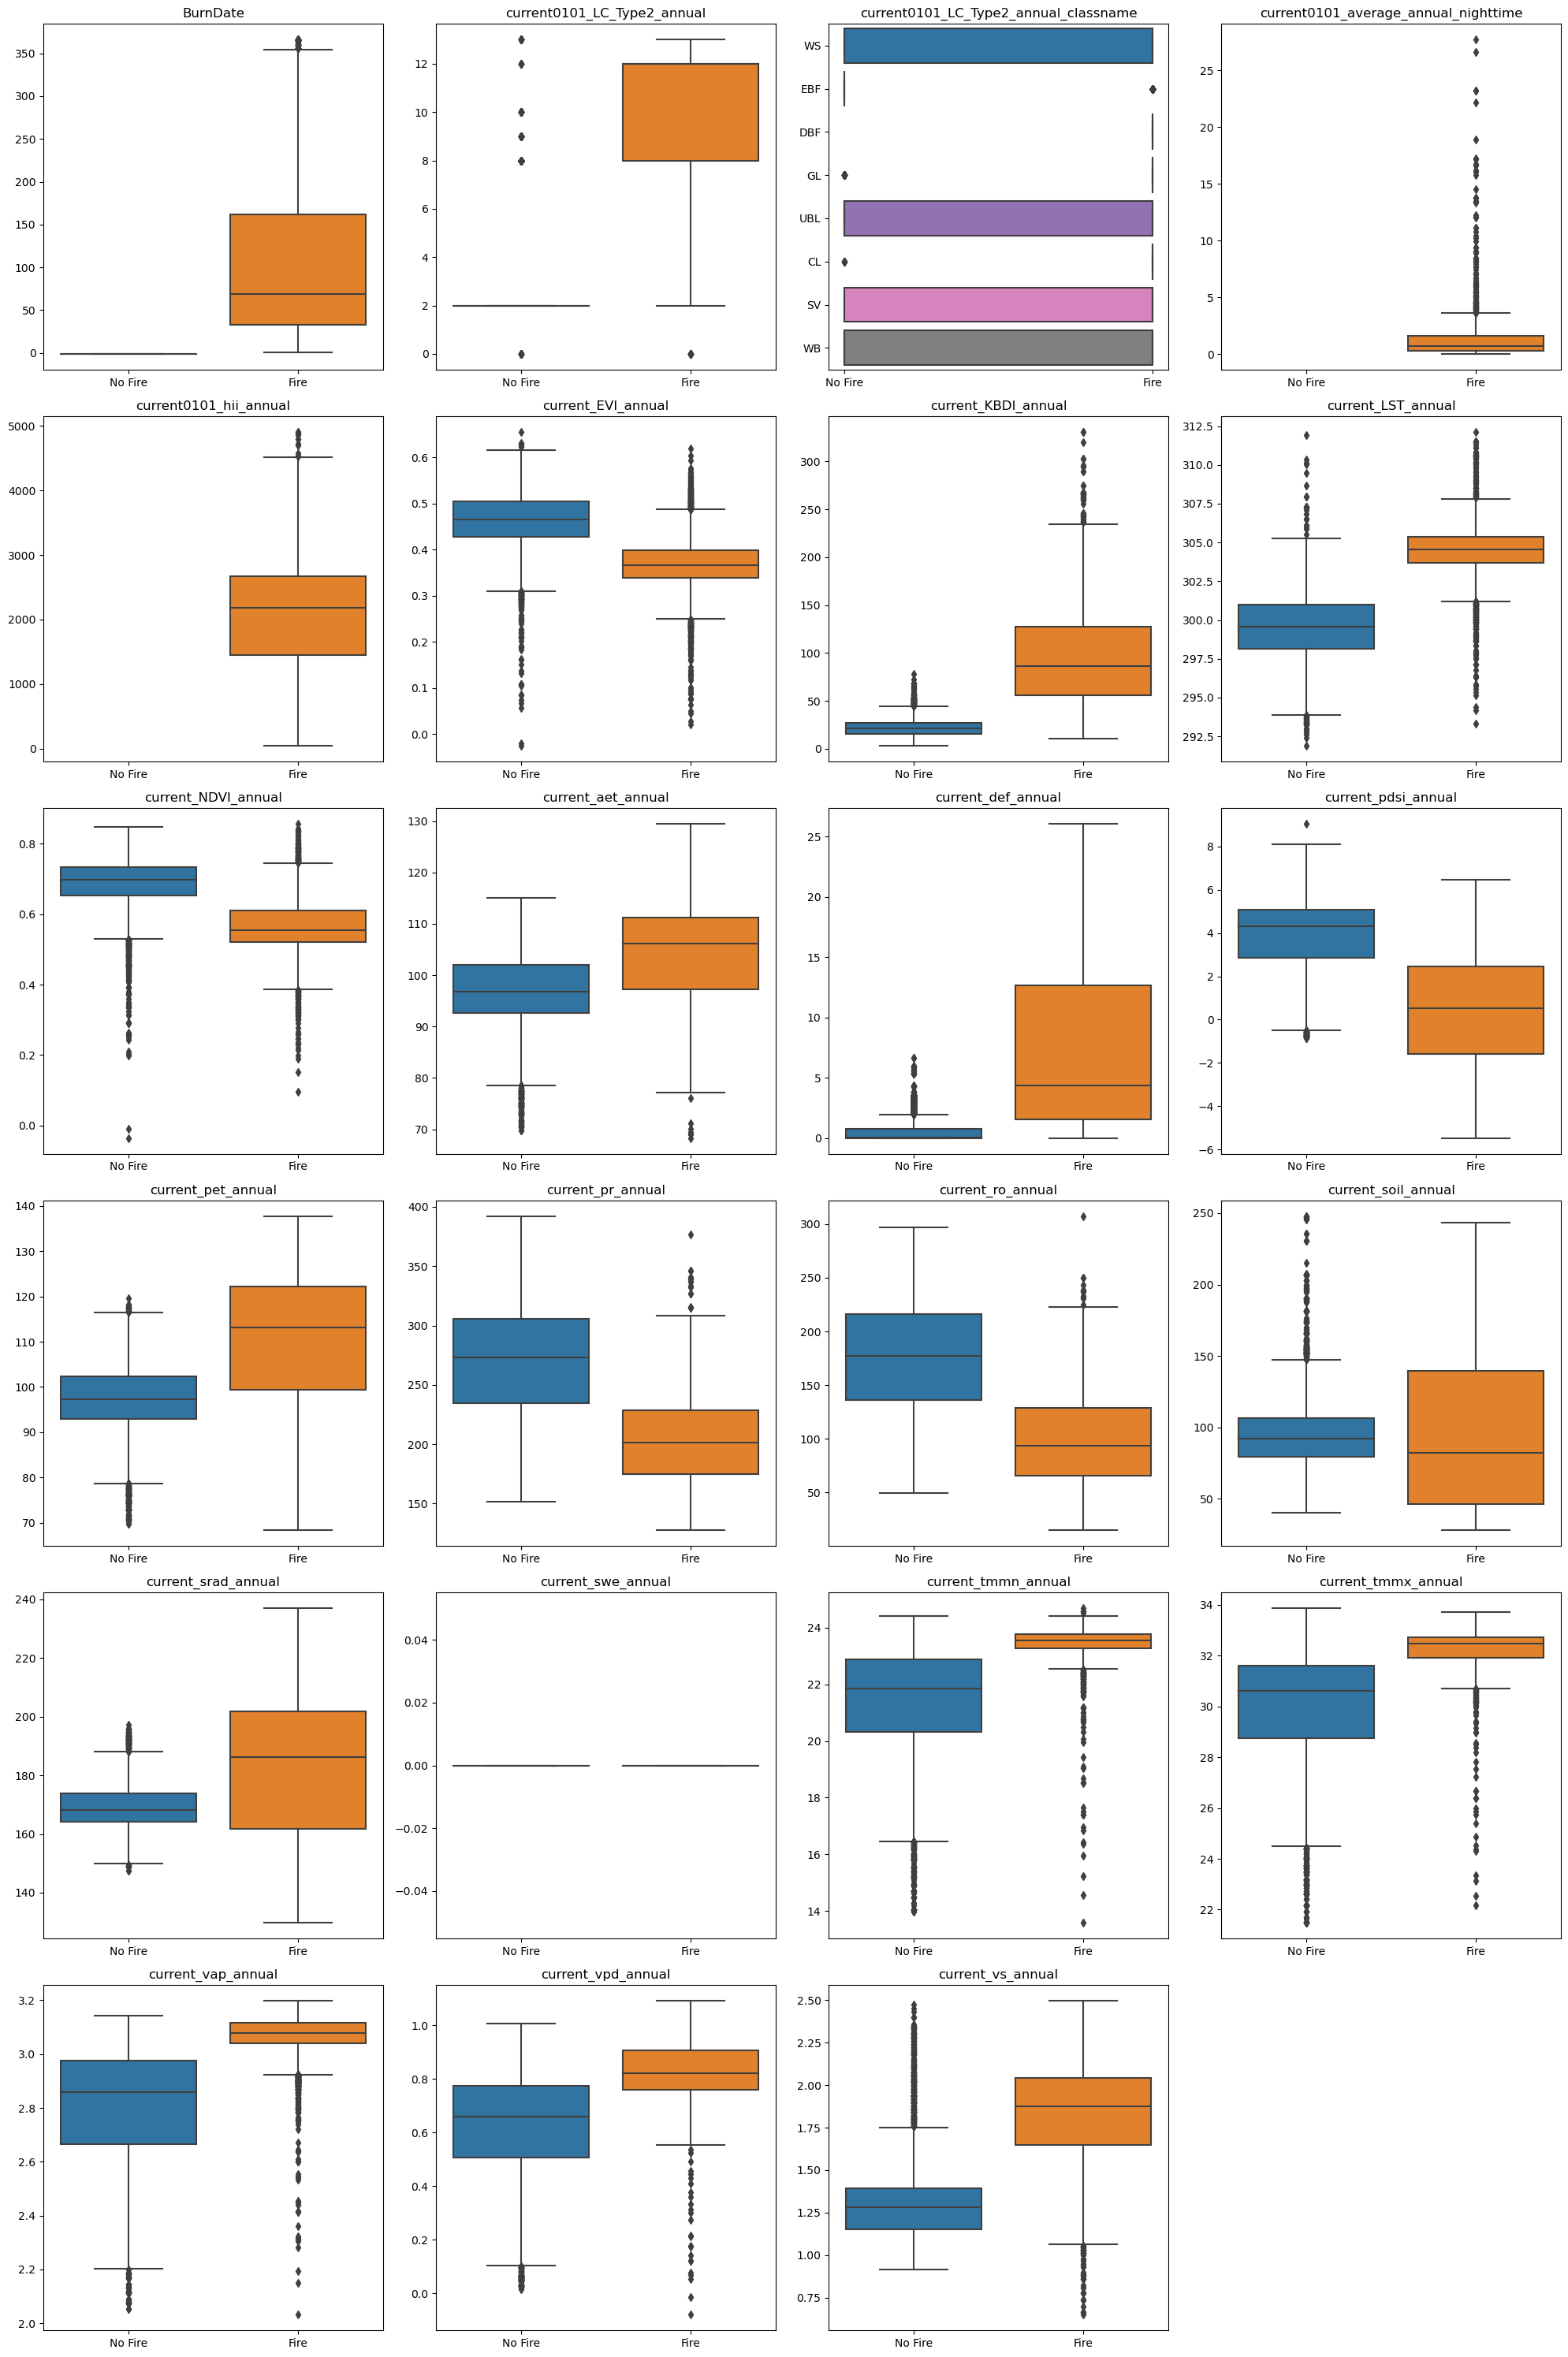

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

rename_mapping = {
    'Woody Savannas': 'WS',
    'Evergreen Broadleaf Forests': 'EBF',
    'Deciduous Broadleaf Forests': 'DBF',
    'Grasslands': 'GL',
    'Urban and Built-up Lands': 'UBL',
    'Croplands': 'CL',
    'Savannas': 'SV',
    'Water Bodies': 'WB'
}

# Rename the values in the column
df_box['current0101_LC_Type2_annual_classname'] = df_box['current0101_LC_Type2_annual_classname'].replace(rename_mapping)

# Assuming 'fire' column indicates whether it's a fire (1) or not (0)
# Adjust 'fire_column' to match your actual column name
fire_column = 'fire'

# List of variables to perform boxplot analysis
variables = df_box.columns.sort_values()
variables = variables.drop('fire')

# Calculate the number of rows needed
num_rows = (len(variables) + 2) // 4  # Add 2 to round up

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each variable and create boxplots
for i, variable in enumerate(variables):
    ax = axes[i]
    sns.boxplot(x=fire_column, y=variable, data=df_box, ax=ax)
    ax.set_title(f'{variable}')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticks(ticks=[0, 1])
    ax.set_xticklabels(['No Fire', 'Fire'])

# Remove empty subplots
for i in range(len(variables), num_rows * 4):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('validate_boxplots_for_research_paper.png', dpi=300)
plt.show()

# T-test statistics and p-value

In [13]:
df_fire = df[df['fire'] == 1]
df_nofire = df[df['fire'] == 0]

columns_to_drop = ['longitude', 'latitude', 'fire', 'date', 'Shape_Leng', 'validOn', 'Shape_Area', 'year', 'month', 'day',
                   'ADM1_PCODE', 'ADM2_PCODE', 'ADM0_EN', 'ADM1_EN', 'ADM2_EN', 'ADM0_PCODE', 'system:index']

# Drop the specified columns
df_fire = df_fire.drop(columns=columns_to_drop)
df_nofire = df_nofire.drop(columns=columns_to_drop)

In [14]:
from scipy.stats import ttest_ind

# List of variables to perform boxplot analysis
variables = df_fire.columns.sort_values()
variables = variables.drop('fire')
variables = variables.drop('current0101_LC_Type2_annual_classname')

KeyError: "['fire'] not found in axis"

In [ ]:
# Initialize lists to store results
results = []
columns = ['Variable', 't-statistic', 'p-value']

# Loop through each variable and perform t-test
for variable in variables:
    # Perform two-sample t-test
    t_statistic, p_value = ttest_ind(df_nofire[variable].dropna(), df_fire[variable].dropna(), equal_var=False)
    # Append results to the list
    results.append([variable, t_statistic, p_value])
#     print(t_statistic)

# Create DataFrame from results
results_df = pd.DataFrame(results, columns=columns)

# Display results
print(results_df)

In [ ]:
results_df

In [ ]:
results_df


In [ ]:
# Define the list of columns to sort by
sort_columns = ['BurnDate', 'current0101_LC_Type2_annual', 'current_EVI_annual', 'current_KBDI_annual',
                'current_LST_annual', 'current_NDVI_annual', 'current_aet_annual', 'current_def_annual',
                'current_pdsi_annual', 'current_pet_annual', 'current_pr_annual', 'current_ro_annual',
                'current_srad_annual', 'current_tmmn_annual', 'current_tmmx_annual', 'current_vap_annual',
                'current_vpd_annual', 'current_vs_annual', 'current_soil_annual',
                'current0101_average_annual_nighttime', 'current0101_hii_annual', 'current_swe_annual']

# Sort the DataFrame based on the specified columns
results_df_sorted = results_df.set_index('Variable').loc[sort_columns].reset_index()

# Display the sorted DataFrame
print(results_df_sorted)

In [ ]:
results_df_sorted

# Variance Inflation Factor (VIF)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
columns_to_drop = ['longitude', 'latitude', 'date', 'Shape_Leng', 'validOn', 'Shape_Area', 'year', 'month', 'day',
                   'ADM1_PCODE', 'ADM2_PCODE', 'ADM0_EN', 'ADM1_EN', 'ADM2_EN', 'ADM0_PCODE', 'system:index','BurnDate','fire']

# Drop the specified columns
df_vif = df.drop(columns=columns_to_drop)
df_vif = df_vif.select_dtypes(include=['number'])
df_vif = df_vif.dropna()
print("contain only", len(df_vif), "rows")

In [ ]:
# Calculate VIF for each variable
vif_data = {'Variable': df_vif.columns}
vif_data['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(0, df_vif.shape[1])]

# Convert VIF data to DataFrame
vif_df = pd.DataFrame(vif_data)

# sort
vif_df = vif_df.sort_values(by='VIF', ascending=False)
# Display VIF DataFrame
vif_df

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(vif_df['Variable'], vif_df['VIF'], color='steelblue')
plt.xscale('log')
plt.xlabel('VIF (Variance Inflation Factor) [Log]')
plt.title('VIF Values for Variables')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest VIF at the top
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(vif_df['Variable'], vif_df['VIF'], color='steelblue')
# plt.xscale('log')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF Values for Variables')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest VIF at the top
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(vif_df['Variable'], vif_df['VIF'], color='steelblue')
# plt.xscale('log')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF Values for Variables')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest VIF at the top

bars = plt.barh(vif_df['Variable'], vif_df['VIF'], color='steelblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=8)

plt.show()